# Correlation: Comparing 2 Continuous Variables

What is it?
- describes the strength and direction of an association between two variables

Why do we care?
- using math, we can check if two variables are related
- can use this knowledge for feature selection and multivariate analysis in the data pipeline

In [ ]:
#standard ds imports
import numpy as np
import pandas as pd

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#we love stats!!!


## When do we use it? 

- when are you trying to determine a LINEAR RELATIONSHIP between TWO CONTINUOUS variables

## How does it describe the strength and direction?

- it uses a correlation coefficient 
- it will be a unitless value
- it can range from -1 to 1
    - the closer to 1 or -1, the greater the strength of the relationship
    - 0 implies no correlation
    - positive means positive relationship
    - negative means negative relationship

# Show us!

## Examples of Different Correlations

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]

plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o')
plt.title('Perfect positive correlation, (r=1)', size=16)
plt.show()

In [ ]:
x = [3, 2, 1]
y = [1, 2, 3]

plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o')
plt.title('Perfect negative correlation (r=-1)', size=16)
plt.show()

In [ ]:
x = [1, 2, 3]
y = [1, 1, 1]

plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o')
plt.title('Absolutely no correlation (r=0)', size=16)
plt.show()

In [ ]:
x = [8,7,6.5,7,6,7.5,8.5,9,8,5.5]
y = [12,13,15.5,15,10,19,13,20,8,18.5]

r, p = stats.pearsonr(x, y)

plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title(r'No correlation, ($r \approx 0$)', size=16)

print('r =', r)

In [ ]:
x = np.random.randn(100)
y = x + (np.random.randn(100) * 1.1)

r, p = stats.pearsonr(x, y)

plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title(f'Positive correlation, (r={round(r,1)})', size=16)
plt.show()

In [ ]:
x = np.random.randn(100)
y = -x + (np.random.randn(100) * 1.1)

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title(f'Negative correlation, (r={round(r,1)})', size=16)
plt.show()

## Cheat Sheet

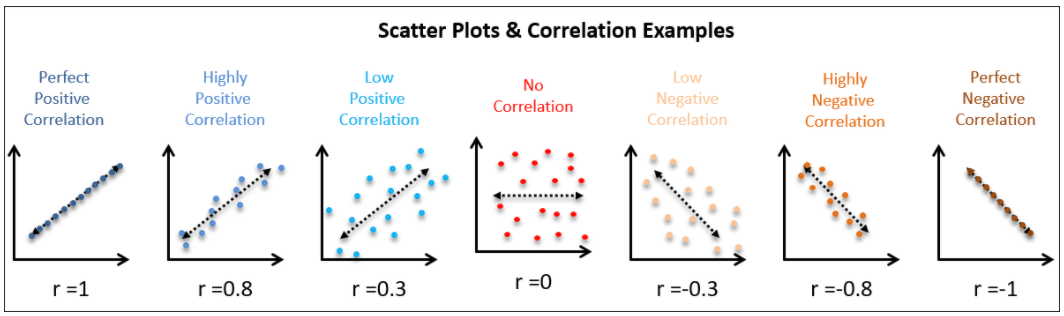

## Now that you're expert correlation-ers

http://guessthecorrelation.com/

# How do we calculate it?

### Hypothesis Testing Procedure:

1. Determine the appropriate test
    - what variables you are comparing?
    - are your variables continuous or categorical?
2. Setup
    - set null hypothesis
    - set alternate hypothesis
    - set p-values
3. Visualize    
4. Calculate test statistic + p-value 
5. Conclude

### Setup for correlation test: 

- if both variables are continuous, we can use our correlation test!


- for normal distributions: `stats.pearsonr`
- for nonparametic test: `stats.spearmanr`


- $H_0$: there is no linear relationship between the two variables

## Let's see it!

### Example: exam scores

In [ ]:
#the data
url = 'https://gist.githubusercontent.com/ryanorsinger/\
2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv'

In [ ]:
#get our data & look at it!


### What's the relationship between exam score and hours studied?


#### 1. Determine the appropriate test
    - what variables you are comparing?
    - are your variables continuous or categorical?

#### 2. Setup
    - null hypothesis
    - alternate hypothesis
    - alpha

#### 3. Visualize

Q: What kind of plot do we want to use when comparing two continuous variables?

In [ ]:
#plot our variables

# plt.title("What's the relationship between exam scores and hours studied?")
# plt.xlabel('hours studied')
# plt.ylabel('exam scores')
# plt.show()

We can see the relationship between them!

#### 4. Calculate test statistic + p-value

In [ ]:
#run stats.pearsonr


In [ ]:
#output results
print('r =', r)
print('p =', p)

#### 5. Conclude

In [ ]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

## Correlation "gotchas"

When looking at correlation, keep in mind:

1. Correlation is not causation!
2. This is just looking at a *linear* relationship
3. Correlation itself just looks 2 variables, there could be more going on
4. Correlation doesn't tell us how large the relationship is

## 1. Example: not causation!

http://www.tylervigen.com/spurious-correlations

## 2. Example: non-linear relationship

- $H_o$: there is no linear relationship between x and y 
- $H_a$: there is a linear relationship between x and y

In [ ]:
x = np.linspace(-3, 3)
y = x ** 2

In [ ]:
#calculate r and p


print('r =', r)
print('p =', p)

In [ ]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

In [ ]:
#plot it


plt.title('Non-linear relationship')
plt.show()

## 3. Example: confounding variable

### What is the relationship between coffee consumed and exam scores?

In [ ]:
df.head()

In [ ]:
#plot it
plt.scatter(df.coffee_consumed, df.exam_score)

plt.title('How does the amount of coffee consumed correlate to exam scores?')
plt.show()

In [ ]:
#calculate r and p 
r,p = stats.pearsonr(df.coffee_consumed, df.exam_score)

print('r = ', r)
print('p = ', p)

This shows us that exam scores and coffee consumed have a strong negative correlation. 

But is there something else affecting this? 

Probably hours slept! This is known as a confounding variable.

## Let's look at hours slept compared to both variables

In [ ]:
r_sleep_coffee, _ = stats.pearsonr(df.hours_slept, df.coffee_consumed)
r_sleep_score, _ = stats.pearsonr(df.hours_slept, df.exam_score)

print('Correlation between hours slept and coffee consumed')
print(f'  r = {r_sleep_coffee:.3f}')
print('Correlation between hours slept and exam score')
print(f'  r = {r_sleep_score:.3f}'\

#### This is a confounder

We saw a correlation between our independent variable and dependent variable 
> coffee consumed ----> exam scores 


However, we have a confounder that affects both our independent variable and dependent variable

> hours slept ----> coffee consumed

>  &

> hours slept ----> exam score

Therefore, our confounder caused spurious correlation between our indepedent variable and dependent variable 

## 4. Example: relationship magnitude

### How does coffee consumption relate to exam scores?

In [ ]:
coffee_consumption = [0, 1, 2, 3, 4]
exam_score = [80, 80.1, 80.2, 80.3, 80.4]

In [ ]:
#calculate r and p
r, p = stats.pearsonr(coffee_consumption, exam_score)

#plot it
plt.plot(coffee_consumption, exam_score, marker='o')
plt.ylim(0, 100)

print('r=', r)

## Exercise Guidance

What does it mean to "control for"?

Let's look at the relationship between exam scores and hours studied and control for handedness!

### Regular way - Without controling for a variable

In [ ]:
df.head()

#### Setup

$H_0$ : there is no linear relationship between hours studied and exam score

$H_a$ : there is a linear relationship between hours studied and exam score

#### We're gonna use seaborn to plot this time

In [ ]:
#plot
sns.scatterplot(data=df, x='hours_studied', y='exam_score')
plt.title('How does number of hours studied correlate to exam scores?')
plt.show()

In [ ]:
#calculate r and p
r, p = stats.pearsonr(df.hours_studied, df.exam_score)
print('r =', r)
print('p =', p)

### Controlling for handedness!

In [ ]:
#look at our data


In [ ]:
#look at our handedness options


In [ ]:
#plot but separate on handedness

plt.show()

In [ ]:
#create separate dfs for left and right handedness


In [ ]:

print('Lefties')
print('  r =', r)
print('  p =', p)

In [ ]:

print('Righties')
print('  r =', r)
print('  p =', p)